In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ZGlobalLib.gpu_utils import use_gpu
use_gpu(1)

2023-10-23 13:13:03.762383: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 13:13:04.205515: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9651 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:68:00.0, compute capability: 7.5


PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')

In [238]:
from histolungs import *

In [230]:
resolution = '20x'
num_classes = 3

assert resolution in ['20x', '40x', None] # TODO add also the public dataset
assert num_classes in [3,7]

## Get images

In [231]:
# Get paths and labels from private dataset
root_directory = "data/dataset_2_final/"
image_paths = get_files(root_directory, resolution=resolution)

In [6]:
class_names, class2int, labels = get_classes_labels(root_directory, image_paths, num_classes)

In [102]:
train_generator, val_generator = get_generators(image_paths, labels, num_classes=num_classes)

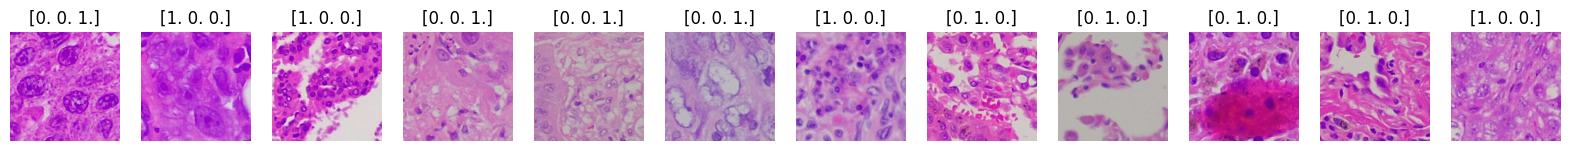

In [99]:
train_generator.show_generator()

[0, 8, 16, 24, 1, 9, 17, 25, 2, 10, 18, 26, 3, 11, 19, 27, 4, 12, 20, 28, 5, 13, 21, 29, 6, 14, 22, 30, 7, 15, 23, 31]


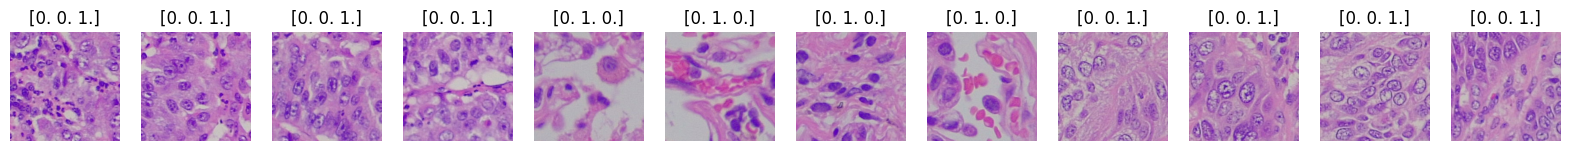

In [100]:
val_generator.show_generator()

In [101]:
class_weights = compute_weights(train_generator)
class_weights

  0%|          | 0/15 [00:00<?, ?it/s]

{0: 0.8469945355191257, 1: 1.55, 2: 0.8516483516483516}

## Train EfficientNet-B0

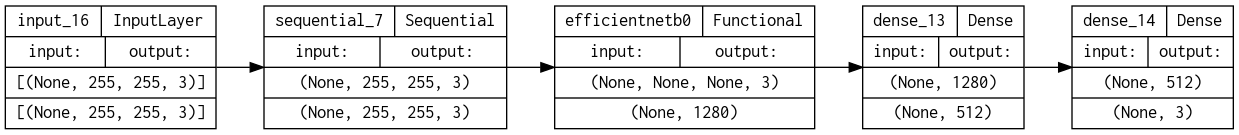

In [104]:
model = get_model(num_classes)
plot_model(model, rankdir='LR', show_shapes=True)

In [106]:
MODEL_NAME = 'Ef0_' + resolution
RUN_NAME = ''
log_dir = f'logs/{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}/{MODEL_NAME}{RUN_NAME}'
log_dir

'logs/20231023-134838/Ef0_20x'

In [107]:
#clear cache
# tf.keras.backend.clear_session()

In [108]:
# Train the model using the custom data generators and the debugging callback
history = train_model(model, train_generator, val_generator, num_classes, class_weights, log_dir)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

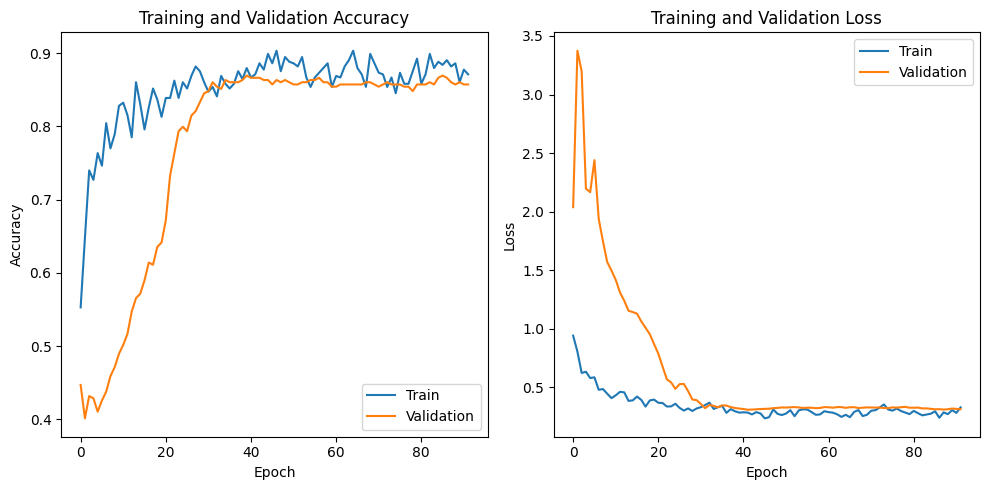

In [110]:
#Plot metrics
plot_metrics(history)

## Evaluate using test data

In [133]:
test_directory = "data/validation_final_septiembre/"

Test Accuracy: 0.65
Test Precision: 0.6450343186336396
Test Recall: 0.7166666666666667


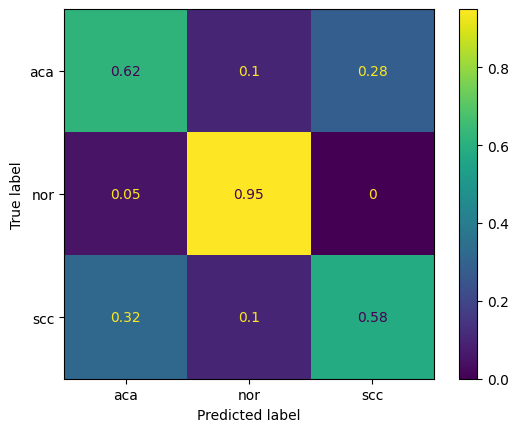

In [240]:
test_model(model, class2int, resolution)